# Summary Statistics Tutorial

When calculating summary statistics for continuous data, we can categorize these statistics into two categories: central tendency or dispersion. Statistics that describe central tendencies are mean and median. For the spread and dispersion of data, we can look at standard deviation, variance and range.

In [1]:
input.dat <- read.csv('data.csv');

In [2]:
str(input.dat);

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

Let's calculate the mean, median, standard deviation, variance and range of the radius_worst variable.

In [3]:
mean(input.dat$radius_worst); # calculates the mean

16.2691898066784

In [4]:
median(input.dat$radius_worst); # calculates the median

14.97

In [5]:
sd(input.dat$radius_worst); # calculates the standard deviation

4.83324158046932

In [6]:
var(input.dat$radius_worst); # calculates the variance

23.3602241751776

In [7]:
range(input.dat$radius_worst);

7.93 
 36.04

# Correlation Tutorial

Correlation measures the strength of relationship between two vectors of numerics. From the correlation coefficient, we can gather information such as the magnitude and the direction of the relationship. Correlation coefficient ranges between -1 and 1 with -1 showing a strong negative relationship and +1 showing a strong positive relationship.

In [8]:
input.dat <- read.csv('data.csv'); # read in our input data

In [9]:
cor(input.dat$smoothness_mean, input.dat$compactness_mean); # correlation between mean smoothness and mean compactness

0.659123215215923

There is a strong correlation between the mean smoothness and mean compactness measures.

In [10]:
cor(input.dat$texture_mean, input.dat$symmetry_mean); # correlation between mean texture and mean symmetry

0.071400980483317

However, there is little to no correlation between mean texture and mean symmetry measures.

# Hypothesis Testing (Student's T-Test) Tutorial

To test whether the mean measurements between two groups are significantly different from 0, we can use the Student's t-test to calculate the p-value

In [11]:
input.dat <- read.csv('data.csv'); # read in our input data

In [12]:
# calculates whether there is a difference in the mean of worst smoothness measures between
# patients with benign or malignant tumours
t.test(smoothness_worst ~ diagnosis, input.dat);


	Welch Two Sample t-test

data:  smoothness_worst by diagnosis
t = -10.82, df = 412.57, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02349864 -0.01627284
sample estimates:
mean in group B mean in group M 
      0.1249595       0.1448452 


# Correlation Plot Tutorial

In [13]:
# load necessary packages
library(ggplot2);
library(corrplot);

corrplot 0.84 loaded


In [14]:
input.dat <- read.csv('data.csv'); # read in our input data

In [15]:
# identify which column has NAs
colnames(input.dat)[apply(input.dat, 2, anyNA)]; 

# remove feature that has missing data
input.dat <- subset(input.dat, select = -c(X));

# convert diagnosis to factors
input.dat$diagnosis <- as.factor(input.dat$diagnosis);

'X'

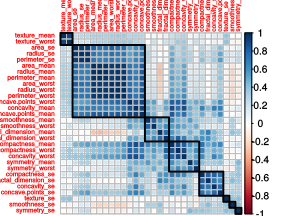

In [16]:
# calculate feature-feature correlation
corr.matrix <- cor(input.dat[,3:ncol(input.dat)]);

# create a heatmap of the correlation matrix using hierarchical clustering
# order = "hclust": using hierarchical clustering order
# tl.cex = 0.4: setting the size of the font to 0.4
# addrect = 8: adding 8 rectangles to correlation plot
corrplot(corr.matrix, order = "hclust", tl.cex = 0.5, addrect = 8);

# Other Plots Tutorial

In [17]:
library(ggplot2);

In [18]:
input.dat <- read.csv('data.csv'); # read in our input data

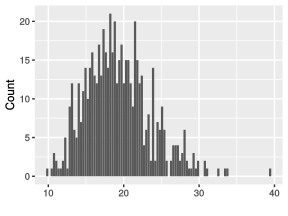

In [19]:
qplot(
    input.dat$texture_mean, # plotting mean texture
    bins = 100, # break continuous data into 100 bins for visualization
    ylab = 'Count', # changing y-axis and x-axis labels
    xlab = ''
    );

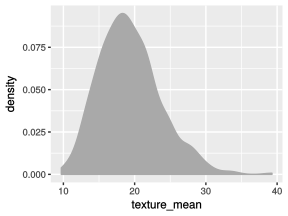

In [20]:
ggplot(
  input.dat, aes(x=texture_mean) # plotting mean texture
  ) + geom_density(aes(fill = '', colour = '') # enabling fill and colour of density curve but no labels
  ) + scale_fill_manual(values = 'darkgray' # changing fill colour to gray
  ) + scale_colour_manual(values = 'darkgray') + theme(legend.position="none"); # removing legend

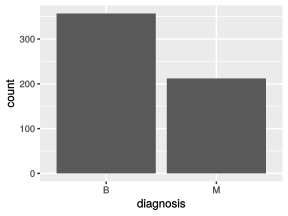

In [21]:
ggplot(
    input.dat, aes(x=diagnosis) # plotting mean texture data categorized into different categories
    ) + geom_bar(stat="count"); # plot 

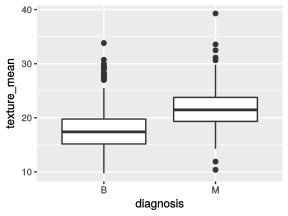

In [22]:
ggplot(
  input.dat, aes(y = texture_mean, x = diagnosis)
  ) + geom_boxplot();